In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


def OLS(x, f, phi, i):
	N = x.shape[0]
	dif_inter, dif_approx = [], []
	A = np.zeros((num_of_points, i))
	for j in range(num_of_points):
		for k in range(i):
			A[j][k] = phi(x[j], k)
	f_cur = np.dot(A.transpose(), f)
	A_cur = np.dot(A.transpose(), A)
	return (solve(A_cur, f_cur, 0.0001), i)

def approx_func(x):
	return math.exp(x)

def poly(x, j):
	return x**j

def pow_x(x, j):
	ans = np.zeros((j, ))
	for i in range(j):
		ans[i] = poly(x, i)
	return ans

# Residual
def half_grad(A, u, f):
	return  np.dot(A, u) - f

# Coefficient for Fast Gradient Method
def tau(A, u, f):
	r_k = half_grad(A, u, f)
	if np.linalg.norm(r_k, 2) == 0:
		return 0
	return np.dot(r_k, r_k)/np.dot(np.dot(A, r_k), r_k)

#Method of Fast Gradient
def solve(A, f, acc):
	u, u_prev = np.zeros(f.shape), np.zeros(f.shape)
	u_prev[0] = acc + 1
	while np.linalg.norm(u - u_prev, 2) > acc:
		u_prev, u = u, u - tau(A, u, f) * half_grad(A, u, f)
	return u



num_of_points = 40
start_x, end_x = -2.0, 2.0
len_int = end_x - start_x

x = np.linspace(start_x, end_x, num_of_points)
f = np.zeros((num_of_points,))
for i in range(num_of_points):
	f[i] = approx_func(x[i])

dif_approx = []
for i in range(1, num_of_points, 1):
	u = OLS(x, f, poly, i)
	error_approx = 0
	for arg in np.linspace(start_x, end_x, num_of_points * 4):
		error_approx += (approx_func(arg) - np.dot(u[0], pow_x(arg, u[1])))**2
	dif_approx.append(error_approx/(num_of_points * 4))

#Add noise
x = x + np.random.uniform(-0.2, 0.2, x.shape)
f = f + np.random.uniform(-0.1, 0.1, f.shape)
u = OLS(x, f, poly, 5)

value = []
for arg in np.linspace(start_x, end_x, num_of_points * 4):
	value.append(np.dot(u[0], pow_x(arg, u[1])))

Text(0.5,1,'Exponent on $[-2, 2]$')

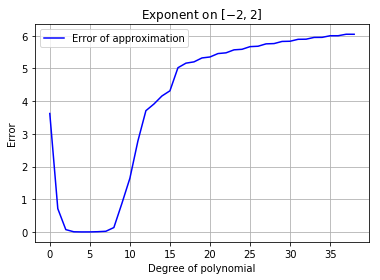

In [2]:
plt.plot(range(i), dif_approx, 'b')
plt.grid(True)
plt.xlabel(r'Degree of polynomial')
plt.ylabel(r'Error')
plt.legend(('Error of approximation',))
plt.title(r'Exponent on $[-2, 2]$')

Text(0.5,1,'Best polinomial')

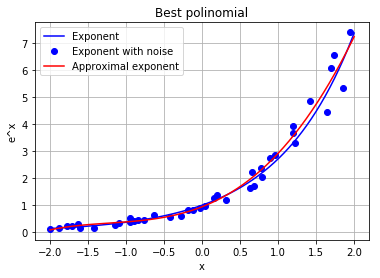

In [3]:
list_arg = np.linspace(start_x, end_x, 400)
plt.plot(list_arg, np.exp(list_arg), 'b')
plt.plot(x, f, 'bo')
plt.plot(np.linspace(start_x, end_x, num_of_points * 4), value, 'r')
plt.grid(True)
plt.xlabel(r'x')
plt.ylabel(r'e^x')
plt.legend(('Exponent', 'Exponent with noise','Approximal exponent'))
plt.title(r'Best polinomial')